#Bancada 3

**<center>Universidade Federal do Pará</center>**

**Curso:** Engenharia Elétrica

**Disciplina:** Laboratório De Sistemas De Controle

**Docente:** Cleison Daniel Silva

**Discentes:**

Edimar Fernandes Dias - 201933940004

D'nne D'Vitor    

Rodrigo Sousa - 201833940020              


# Descrição da Planta:
Uma bancada "motor-gerador" composta por um motor conectado a um gerador (ambos DC), controlados por uma placa Arduino. O motor recebe um sinal de entrada e o gerador fornece um sinal de saída. Há também um filtro passa-baixa RC série na planta.


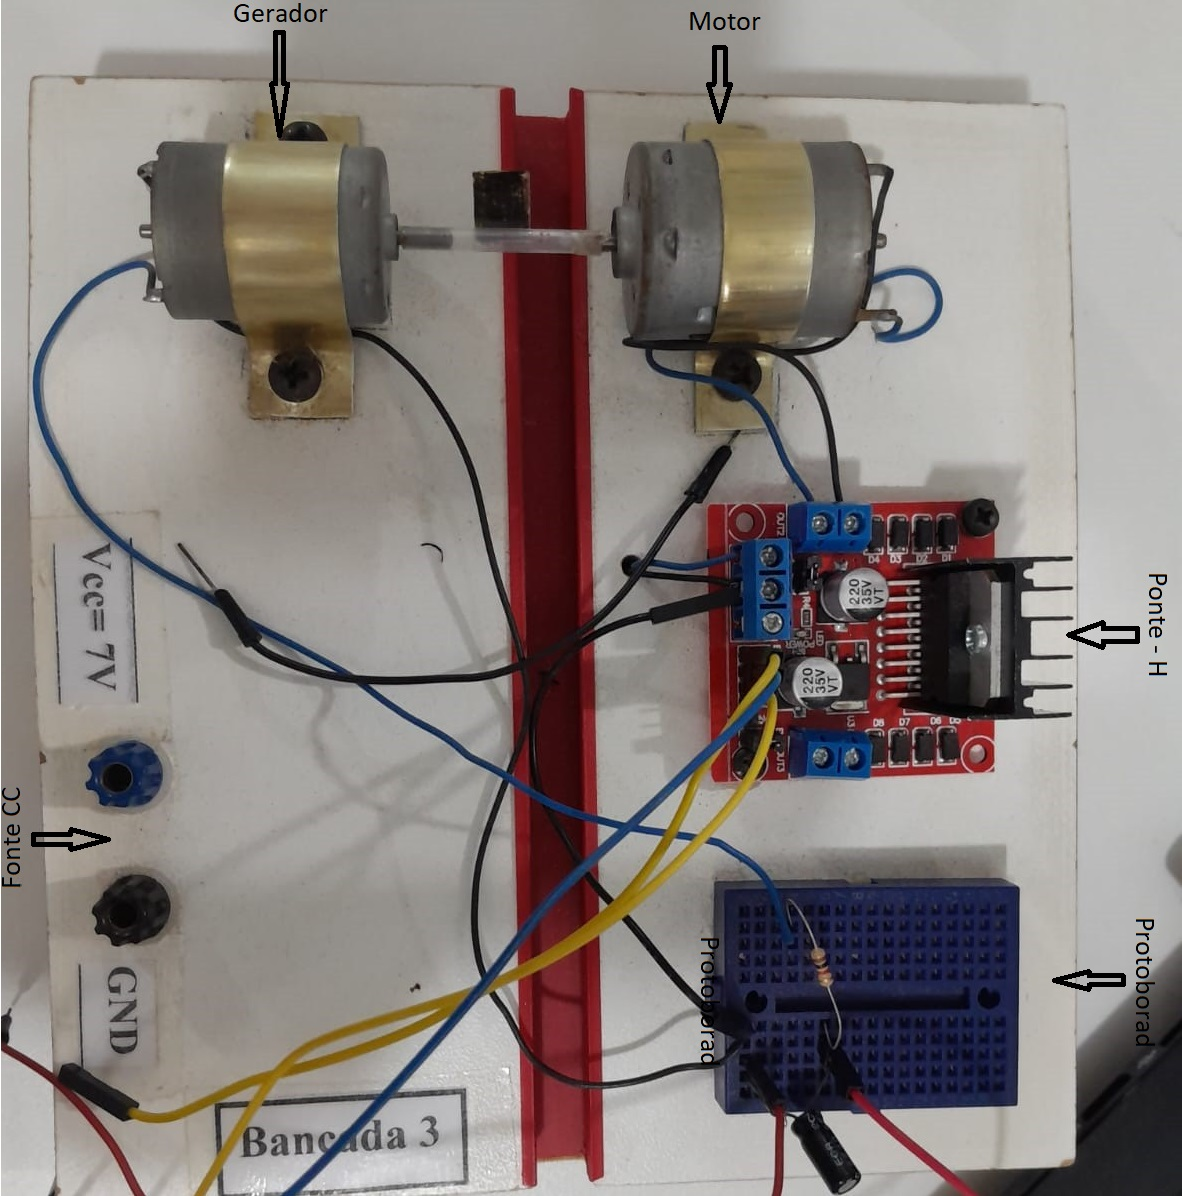

In [ ]:
!pip install control

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Bibliotecas utilizadas**

In [4]:
# ________________ CARREGA BIBLIOTECAS __________#

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import control as ct
import scipy.signal as sg
from control.matlab import *
from scipy.signal import square, sawtooth

# **Ponto de Operação**

## Os dados dos ensaios estão compartilhados na pasta:

/content/drive/MyDrive/driverclt

https://drive.google.com/file/d/1PgPrv-pIslUSd5byrubhRxIrX4s7EBt6/view?usp=sharing

#Dados da Bancada 3

**Utilizando os dados da bancada.**

In [5]:
dados = np.load("/content/drive/MyDrive/driverclt/dados_onda_quadrada.npy")




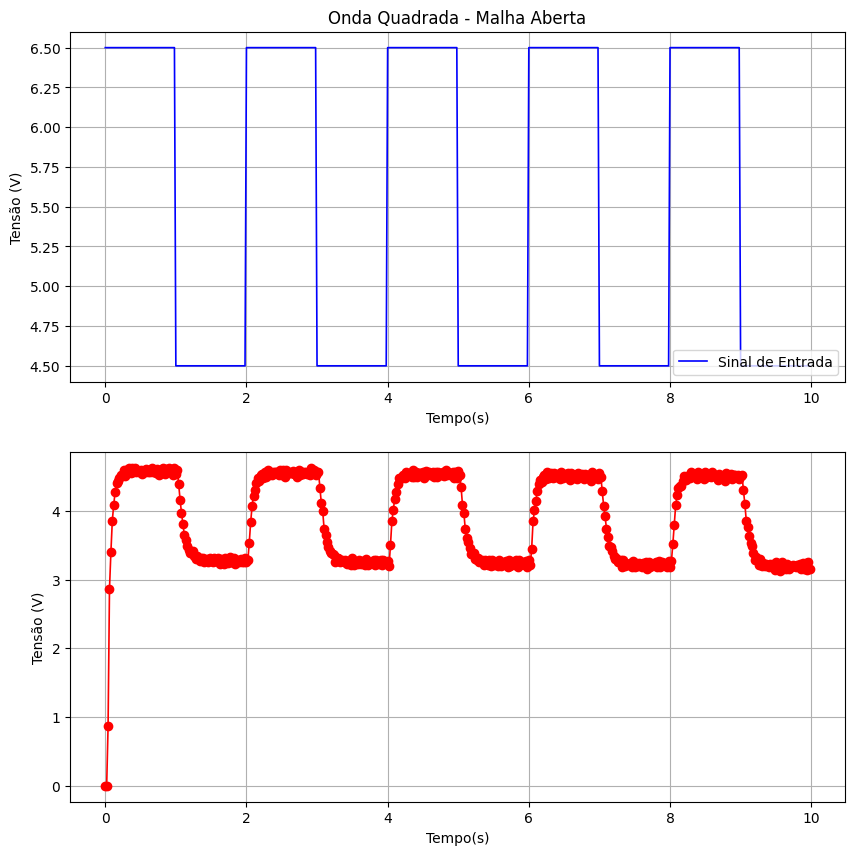

In [6]:
tempo = dados[:, 0]
sinal_entrada = dados[:, 1]
sinal_saida = dados[:, 2]

plt.figure(figsize=(10, 10))
plt.subplot(211)
plt.plot(tempo, sinal_entrada, '-b', linewidth=1.2)
plt.xlabel('Tempo(s)')
plt.ylabel('Tensão (V)')
plt.grid()
plt.title('Onda Quadrada - Malha Aberta')
plt.legend(loc='lower right', labels=('Sinal de Entrada', 'Sinal de Saída'))

plt.subplot(212)
plt.plot(tempo, sinal_saida, '-ro', linewidth=1.2)
plt.xlabel('Tempo(s)')
plt.ylabel('Tensão (V)')
plt.grid()
#plt.title('Tensão de Saída - Malha Aberta')
plt.show()


# Análise da Resposta Transitória

1. A partir do ensaio, desprezar os instantes iniciais;
2. Remover o nível DC dos sinais coletados;


**Nivel DC entrada: 5.5**

**Nivel DC saída: 3.895025**

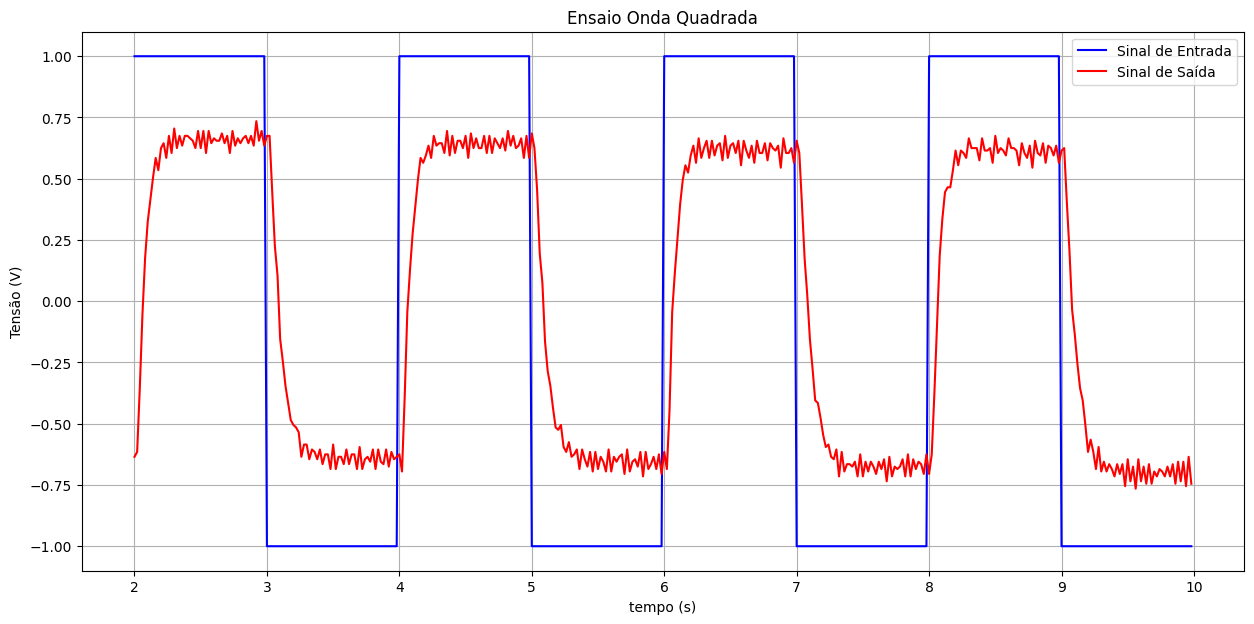

Nivel DC entrada: 5.5
Nivel DC saída: 3.895025


In [7]:
# ________________ Define janela que despreza os primeiros instantes do ensaio __________#

janela = (tempo>2) & (tempo<14)



nivel_dc_entrada = np.mean(sinal_entrada[janela])
#nivel_dc_entrada = 7.

nivel_dc_saida = np.mean(sinal_saida[janela])

# ________________ Remove Nivel DC da Entrada e da Saída __________#

r = sinal_entrada - nivel_dc_entrada
y = sinal_saida - nivel_dc_saida

plt.figure(figsize=(15,7))
plt.plot(tempo[janela],r[janela], c = 'b', label = "Sinal de Entrada")
plt.plot(tempo[janela],y[janela], c = 'r', label = "Sinal de Saída")

plt. title('Ensaio Onda Quadrada')
plt.ylabel('Tensão (V)')
plt.xlabel('tempo (s)')
plt.legend()
plt.grid()
plt.show()

print("Nivel DC entrada:" , nivel_dc_entrada )
print("Nivel DC saída:" , nivel_dc_saida )

3. Realizar a análise para apenas um período do sinal;

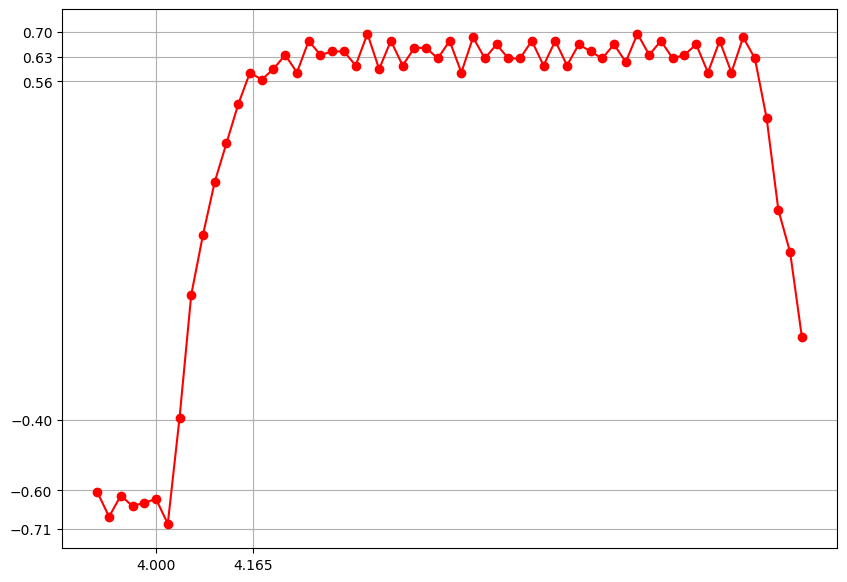

In [8]:
# ________________ Define o intervalo de tempo entre os instantes 3.9 e 5.1 segundos __________#

janela2 = (tempo>3.9)&(tempo<5.1)

plt.figure(figsize=(10,7))
plt.plot(tempo[janela2],y[janela2],'-or')
# plt.plot(tempo[index],r[index],c = 'b')
# plt.yticks([-.5,-.4,0.3097,0.4,0.45,0.5])
plt.yticks([-0.710,-0.400,0.56,0.70,-0.60,0.63])
#plt.yticks([-0.20,0.053,0.17])

plt.xticks([4,4.165])
plt.grid()
plt.show()

#Estimativa do ganho $K_m$.

O ganho é $K_m =  \frac{0.63  -(-0.710)}{2} = 0.67$

In [9]:
Km = (0.63 - (-0.71) )/ 2
print(Km)

0.6699999999999999


**Estimativa constante τ**

In [10]:
y_6321 = 0.6321*(0.63 - (-0.60)) - 0.70
y_6321

0.07748300000000008

#Simulação do modelo

Tendo estimado Km e Tau, podemos observar a função de transfência do sistema.
Onde obtivemos o Erro RMS de: Erro RMS: 3.898127761310613 e função de transfêreincia G(s).

Função de transfência de primeira ordem pode ser obtida atravez de:
$$G(s)=\frac{Km}{\tau s + 1}$$

Logo

$$G(s)=\frac{0.67}{0.07748 s + 1}$$


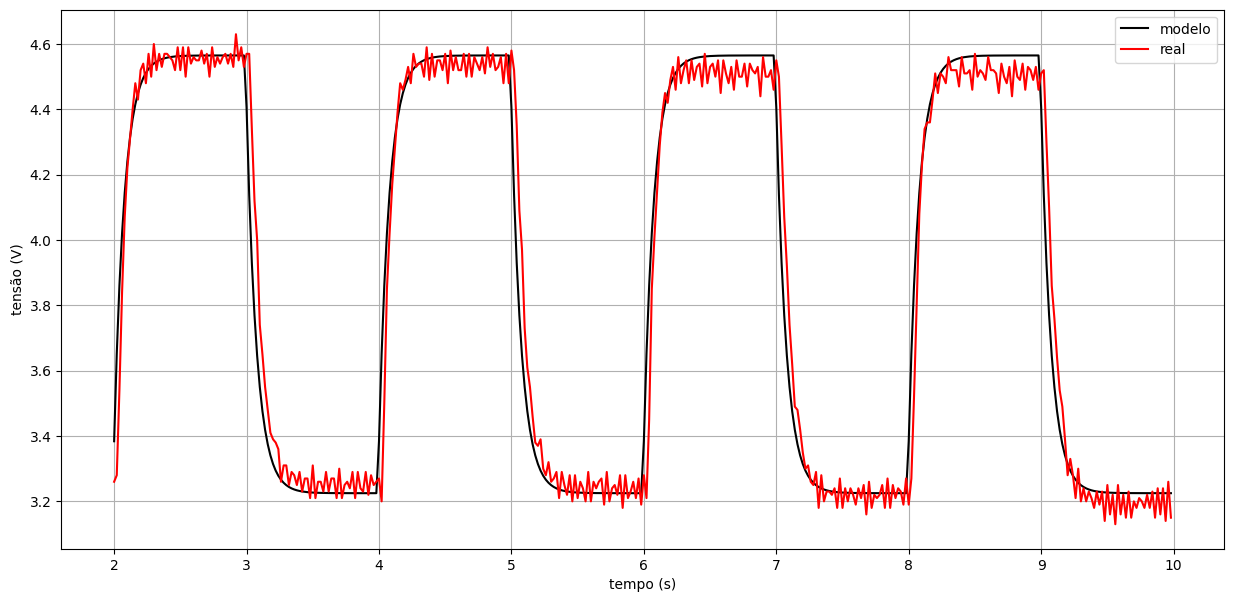


    0.67
-------------
0.07748 s + 1

Erro RMS: 3.8964995738571826


In [ ]:
# ________________ Simulação do Modelo Determinado __________#

Km = 0.67
τ = 0.07748300000000008

num = [Km]
den = [τ, 1]

G = ct.tf(num,den)
_,ym = ct.forced_response(G,T = tempo, U = r)

plt.figure(figsize=(15,7))
plt.plot(tempo[janela], ym[janela] + nivel_dc_saida ,'k', label = 'modelo')
plt.plot(tempo[janela], sinal_saida[janela] ,'r', label = 'real')
# plt.axis([0,14,-.5,0.5])
plt.xlabel('tempo (s)')
plt.ylabel('tensão (V)')
plt.legend()
plt.grid()
plt.show()
print (G)

erro_rms = (np.sum((ym[janela] - sinal_saida[janela])**2)/np.size(sinal_saida[janela]))
print("Erro RMS:", np.sqrt(erro_rms))

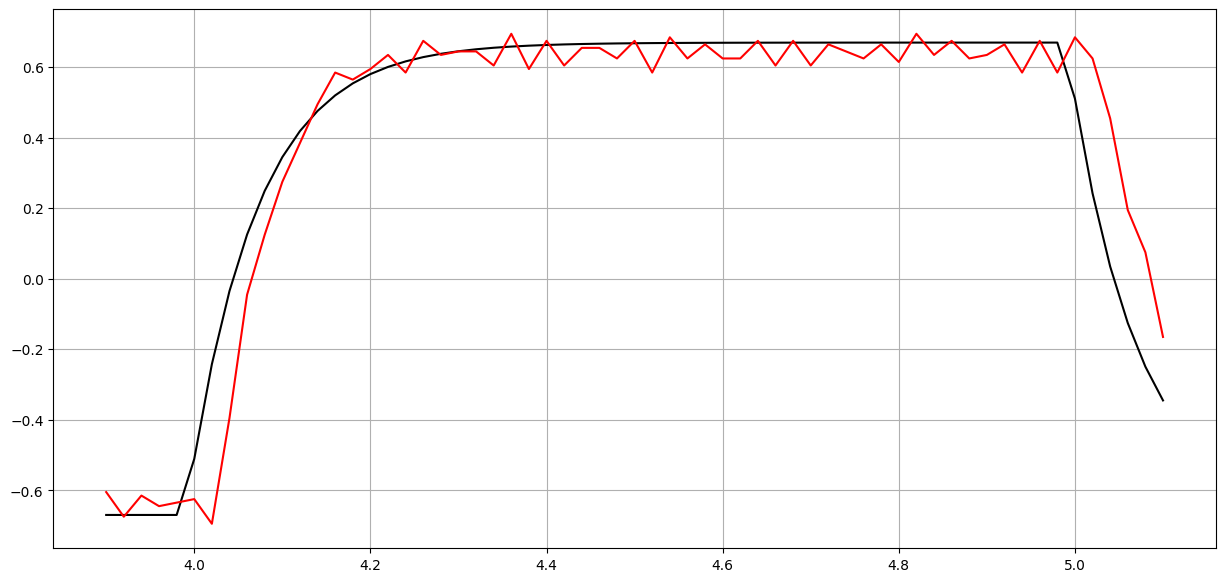

In [ ]:
# ________________ Define o intervalo de tempo entre os instantes 3.9 e 5.1 segundos __________#

index = (tempo>3.9)&(tempo<5.1)

plt.figure(figsize=(15,7))
plt.plot(tempo[index],ym[index],'k',tempo[index],y[index],'r')
plt.grid()
plt.show()

#Agora vamos simular o sistema, projetar o controlador e simular em malha aberta e malha fechada.

**Sistema em malha aberta apresenta a seguinte dinâmica:**

In [ ]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt
from scipy.signal import square, sawtooth

G(s) = 
    0.67
-------------
0.07748 s + 1



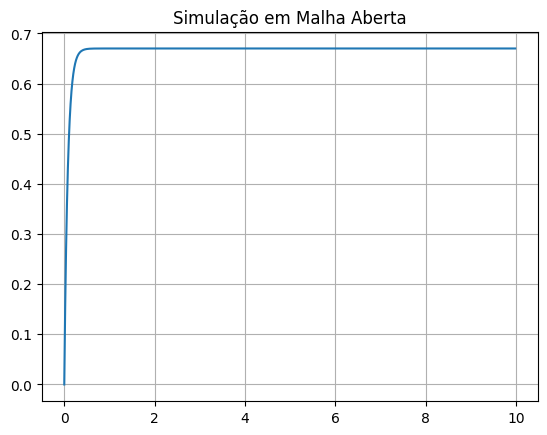

In [ ]:
# Sistema Malha aberta
numAmostras = 500
t = np.zeros(numAmostras)
y = np.zeros(numAmostras)
Ts = 0.02
fre = 0.05
r = 1
u = np.zeros(numAmostras)
for n in range(numAmostras):
    u[n] = r*square(2*np.pi*fre*n*Ts)
    t[n] = n*Ts

#km = 1.2
#tau = 0.171
km = 0.67
tau = 0.07748300000000008

Num = np.array([km])
Den = np.array([tau, 1])
Gs = ct.tf(Num, Den)
print('G(s) =',Gs)

t, Y = ct.forced_response(Gs, t, u)

plt.figure()
plt.plot(t, Y)
plt.title('Simulação em Malha Aberta')
plt.grid()
plt.show()

#Vamos implementar um controlador proporcional (P)

Exploramos o controle proporcional em sistemas dinâmicos, abordando conceitos teóricos e aplicando simulações no ambiente Colab. Variações no ganho proporcional foram analisadas. O controle proporcional oferece simplicidade, estabilidade relativa e ajuste fácil, mas tem limitações, incluindo erro em regime permanente e dependência do modelo.

**Erro em Regime Permanente:** Em sistemas com erro em regime permanente, o controle proporcional sozinho pode não eliminar completamente o erro. Isso significa que a saída do sistema pode permanecer um pouco distante do valor desejado a longo prazo.

**Dependência do Modelo:** O controle proporcional muitas vezes depende de um modelo preciso do sistema. Se o modelo não for preciso, o desempenho do controle proporcional pode ser comprometido.

# **Simulação do Sistema em Malha Fechada**

Ganho Proporcional:  0.6396588486140725
Ganho DC:  0.3
Sistema em Malha Aberta:
 
    0.67
-------------
0.07748 s + 1

Sistema em Malha Fechada:
 
     0.4286
-----------------
0.07748 s + 1.429



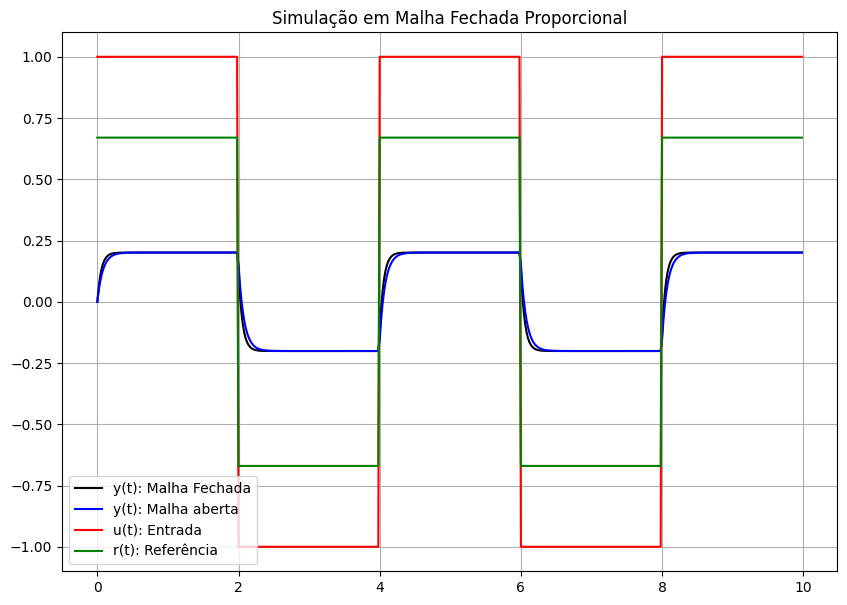

In [ ]:

kp = (10/7 - 1)/km  #Definindo o valor do ganho proporcional Kp
Gc = kp
H = ct.feedback(Gc*Gs, 1, -1)
t, Ymf = ct.forced_response(H, t, u) #Resposta de malha fechada do sistema com controlador Kp

print("Ganho Proporcional: ", kp)
Ganho = (km*kp)/(1+kp*km)
print("Ganho DC: ", Ganho)


# Sinal de entrada e de referência
N = 500
Amplutude = 1
freq = 0.25
Fs = 50
Ts = 1/Fs
km = 0.67
tau = 0.07748300000000008

n = np.arange(0, N)
tempo = n*Ts

sinal_de_entrada = Amplutude*square(2*np.pi*freq*n*Ts)
sinal_de_referencia = km*Amplutude*square(2*np.pi*freq*n*Ts)
nivel_dc_entrada = 5.5
# Sistema em Malha Aberta

NUM = [km]
DEN = [tau, 1]
G = ct.tf(NUM, DEN)

_, y_malha_aberta = ct.forced_response(G, T=tempo, U=sinal_de_entrada)
print("Sistema em Malha Aberta:\n", G)

#Controlador Propocional
Kp = 0.6396588486140725
Gc = kp

#Sistema em Malha Fechada

H = ct.feedback(Gc*G, 1, sign=-1)
print("Sistema em Malha Fechada:\n", H)

## ________Simulação do Sistema em Malha Fechada para Onda Quadrada __________##

_, y_malha_fechada = ct.forced_response(H, T=tempo, U=sinal_de_referencia)

plt.figure(figsize=(10, 7))
plt.plot(tempo, y_malha_fechada, '-k', label="y(t): Malha Fechada")
plt.plot(tempo, 0.3*y_malha_aberta, '-b', label="y(t): Malha aberta")
plt.plot(tempo, sinal_de_entrada, '-r', label="u(t): Entrada")
plt.plot(tempo, sinal_de_referencia, '-g', label="r(t): Referência")
plt.title('Simulação em Malha Fechada Proporcional')
plt.legend()
plt.grid()
plt.show()


# **Sinal de Controle**

<p align = 'justify' > Em simulação, pode-se admitir valores elevados para o ganho do controlador, com a finalidade de reduzir o erro em regime permanente. No entanto, quanto maior o valor de $K_p$, maior será a magnitude do sinal de controle. </p>

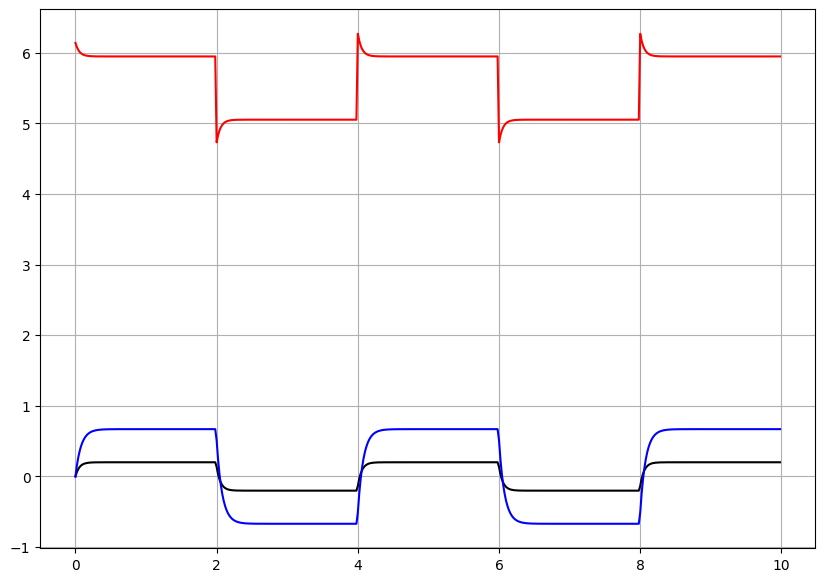

In [ ]:
C = ct.feedback(Gc, G, sign =-1)
_, sinal_controle = ct.forced_response(C, T = tempo, U = sinal_de_entrada)

## ________Simulação do Sistema em Malha Fechada para Onda Quadrada __________##

plt.figure(figsize=(10,7))
plt.plot(tempo, y_malha_fechada, '-k')
plt.plot(tempo, y_malha_aberta, '-b')
plt.plot(tempo, sinal_controle+nivel_dc_entrada, '-r', label= "Sinal de Controle")
plt.grid()
plt.show()


**Root Locus**

#  **Projeto do Controlador PI**

Com o controlador PI na malha, o tipo do sistema passa a ser Tipo 1 (erro em regime permanente nulo para entrada degrau).


Os parâmetros $K$ e $b$ são conhecidos a partir do modelo do sistema em malha aberta.

Os polos são parametrizados por $\zeta$ e $\omega_n$.

Assim, as especificações de desempenho do sistema em malha fechada podem ser traduzidas em valores de $\zeta$ e $\omega_n$.

Onde os valores obtidos foram:
$$\zeta = 0.6901067305598217$$

$$\omega_n =  10.53855432887542$$

In [ ]:
#___________ Especificações de desempenho _________


UP = 5    # Ultrapassagem percentual em %
Ta = 0.55

qsi = -np.log(UP/100)/(np.sqrt(np.pi**2 + np.log(UP/100)**2))

print("Fator de amortecimento: ", qsi)


wn = 4/(qsi*Ta)
print("Frequencia natural: ", wn)

Fator de amortecimento:  0.6901067305598217
Frequencia natural:  10.53855432887542


#Simulação em malha fechada

Ganho do Controlador PI: 
 0.1895902306648592 
 Zero do PI: 
 67.74507802931615
{'RiseTime': 0.201476195636979, 'SettlingTime': 0.5564580641402277, 'SettlingMin': 0.9198887661640959, 'SettlingMax': 1.0506902261316862, 'Overshoot': 5.069022613168617, 'Undershoot': 0, 'Peak': 1.0506902261316862, 'PeakTime': 0.3933582867198161, 'SteadyStateValue': 1.0}


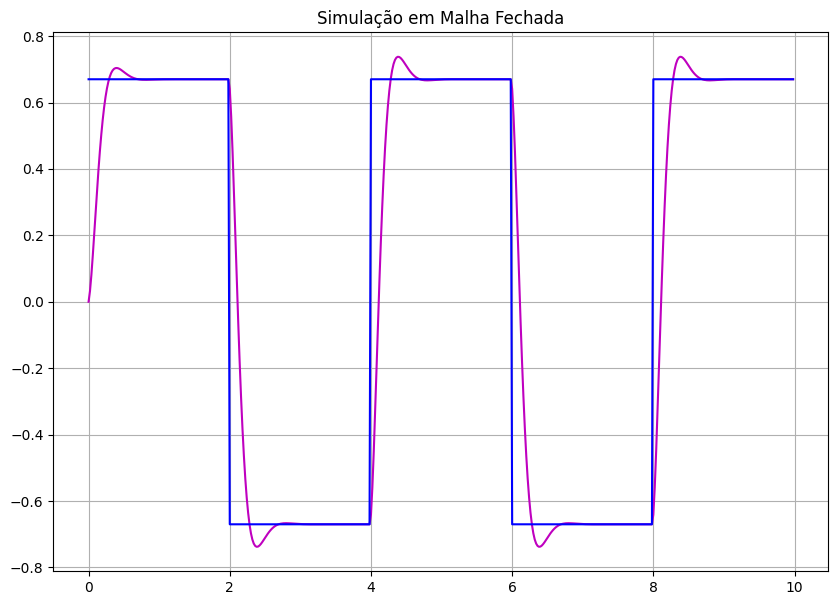

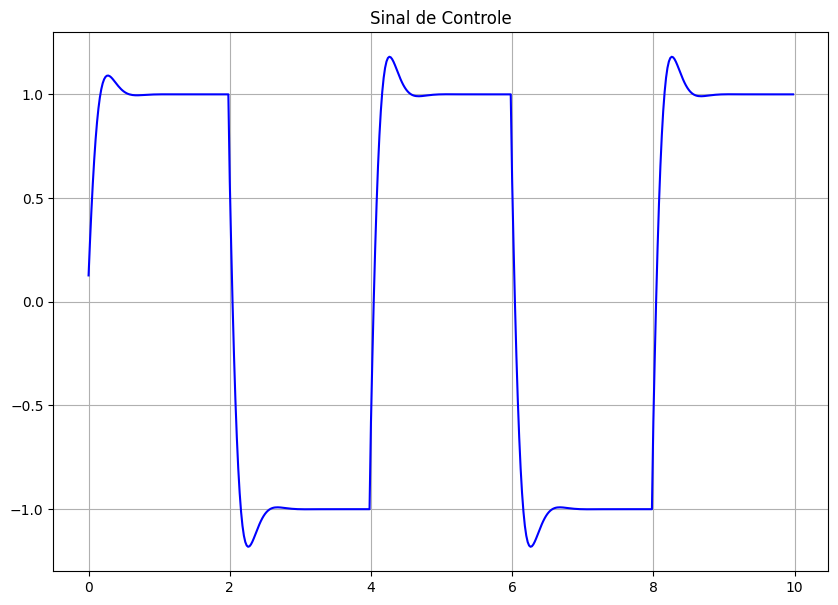

In [ ]:

b = 1/tau
K = Km

# Fator de Amortecimento
qsi = 0.6901067305598217

# Freq Natural
wn = 10.53855432887542

ki = 0.1895902306648592

Kc = (((2*qsi*wn)/b)-1)/K
a =  (wn**2)/(Kc*K*b)

print('Ganho do Controlador PI: \n', Kc, '\n Zero do PI: \n', a)

# K = 3.57
# a = -24

Gc = ct.tf([Kc*1,Kc*a],[1,0])

H_pi = ct.feedback(Gc*G, 1, sign = -1)
print(ct.step_info(H_pi))

C_pi = ct.feedback(Gc, G, sign = -1)

_,ymf_pi = ct.forced_response(H_pi, T = tempo, U = sinal_de_referencia)
_,u_pi = ct.forced_response(C_pi,T = tempo, U = sinal_de_referencia)

plt.figure(figsize=(10,7))
# plt.plot(tempo,ym,'k' ,tempo,y,'r')
plt.plot(tempo,ymf_pi,'m')
plt.plot(tempo,sinal_de_referencia,'b')
plt.title("Simulação em Malha Fechada")
plt.grid()
plt.show()

plt.figure(figsize=(10,7))
plt.plot(tempo,u_pi,'b')
plt.title("Sinal de Controle")
plt.grid()
plt.show()


Polos de MF: 
 [-7.27272727+7.62683193j -7.27272727-7.62683193j]


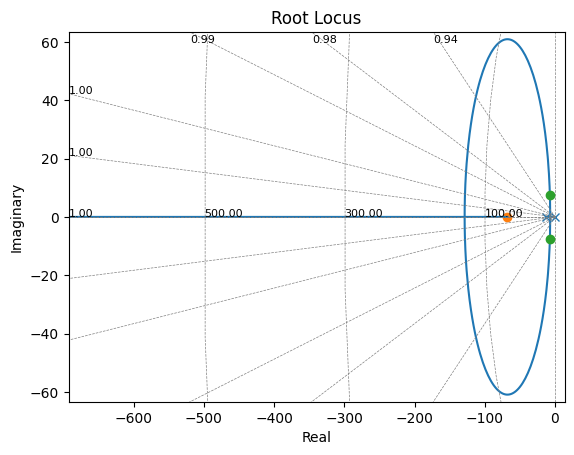

Freq Natural: 
 [10.53855433 10.53855433]
Fator de Amortecimento: 
 [0.69010673 0.69010673]


In [ ]:
ct.rlocus(Gc*G, plot=True, grid = True);
print('Polos de MF: \n', H_pi.pole() )
plt.plot(np.real(H_pi.pole()),np.imag(H_pi.pole()),'o')
plt.show()
print('Freq Natural: \n', np.abs(H_pi.pole()))
print('Fator de Amortecimento: \n', np.cos(np.pi - np.angle(H_pi.pole())))

In [ ]:
Gz = ct.c2d(Gc,Ts, 'tustin')

print('Função de Transferência: \n', Gz)

Função de Transferência: 
 
0.318 z - 0.06115
-----------------
      z - 1

dt = 0.02



$$\frac{U(z)}{E(z)} = \frac{b_0 z + b_1}{z - 1} \frac{z^{-1}}{z^{-1}} $$


Equação de Diferenças:

$$ u(k) = u(k-1) + 0.318 e(k) + 0.06115 e(k-1)$$